<a href="https://colab.research.google.com/github/RatchanonPa/bsc_dpdm24/blob/main/Data_Mining_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report, roc_curve)
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Load Data

In [62]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)

In [74]:
df = pd.read_csv('/content/combined_data.csv')
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,1,1.0,57.16,1.0,57.16,1.0,57.16,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,1,1.0,81.51,1.0,81.51,1.0,81.51,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,1,1.0,146.00,1.0,146.00,1.0,146.00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,1,1.0,64.49,1.0,64.49,1.0,64.49,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,1,1.0,50.99,1.0,50.99,1.0,50.99,0.0,0.0,0.0,0.0,0.0,0.0


# Preprocessing

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585177 entries, 0 to 585176
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   TRANSACTION_ID                       585177 non-null  int64  
 1   TX_DATETIME                          585177 non-null  object 
 2   CUSTOMER_ID                          585177 non-null  int64  
 3   TERMINAL_ID                          585177 non-null  int64  
 4   TX_AMOUNT                            585177 non-null  float64
 5   TX_TIME_SECONDS                      585177 non-null  int64  
 6   TX_TIME_DAYS                         585177 non-null  int64  
 7   TX_FRAUD                             585177 non-null  int64  
 8   TX_FRAUD_SCENARIO                    585177 non-null  int64  
 9   TX_DURING_WEEKEND                    585177 non-null  int64  
 10  TX_DURING_NIGHT                      585177 non-null  int64  
 11  CUSTOMER_ID_N

In [76]:
df.describe()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
count,585177.000000,585177.000000,585177.000000,585177.000000,5.851770e+05,585177.000000,585177.000000,585177.000000,585177.000000,585177.000000,585177.000000,585177.000000,585177.000000,585177.000000,585177.000000,585177.000000,585177.000000,585177.000000,585177.000000,585177.000000,585177.000000,585177.000000
mean,292588.000000,2504.463824,5001.267299,53.591784,2.634152e+06,29.988046,0.007418,0.016815,0.278591,0.173840,3.549360,53.587214,17.970799,53.577636,59.243707,53.511359,0.880323,0.003976,5.813969,0.005981,19.221345,0.004896
std,168926.193574,1445.414434,2886.127871,42.104399,1.519822e+06,17.589009,0.085809,0.200850,0.448306,0.378972,1.848813,34.853238,8.145548,30.496330,34.483082,29.512700,1.011985,0.059777,3.684878,0.060745,13.235174,0.044899
min,0.000000,0.000000,0.000000,0.000000,3.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.020000,1.000000,0.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,146294.000000,1253.000000,2507.000000,21.020000,1.327317e+06,15.000000,0.000000,0.000000,0.000000,0.000000,2.000000,25.666667,12.000000,28.169545,30.000000,28.580000,0.000000,0.000000,3.000000,0.000000,7.000000,0.000000
50%,292588.000000,2506.000000,5002.000000,44.620000,2.634019e+06,30.000000,0.000000,0.000000,0.000000,0.000000,3.000000,49.236667,18.000000,52.252308,59.000000,52.727794,1.000000,0.000000,6.000000,0.000000,20.000000,0.000000
75%,438882.000000,3763.000000,7497.000000,76.860000,3.942893e+06,45.000000,0.000000,0.000000,1.000000,0.000000,5.000000,75.930000,24.000000,76.860000,88.000000,77.509130,1.000000,0.000000,8.000000,0.000000,29.000000,0.000000
max,585176.000000,4999.000000,9999.000000,1039.300000,5.270298e+06,60.000000,1.000000,3.000000,1.000000,1.000000,14.000000,818.400000,49.000000,457.105000,153.000000,287.465000,10.000000,1.000000,25.000000,1.000000,76.000000,1.000000


In [77]:
df.isnull().sum()

,0
TRANSACTION_ID,0
TX_DATETIME,0
CUSTOMER_ID,0
TERMINAL_ID,0
TX_AMOUNT,0
TX_TIME_SECONDS,0
TX_TIME_DAYS,0
TX_FRAUD,0
TX_FRAUD_SCENARIO,0
TX_DURING_WEEKEND,0


In [78]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

# Data Exploratory

In [11]:
print('No Frauds', round(df['TX_FRAUD'].value_counts().get(0, 0) / len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['TX_FRAUD'].value_counts().get(1, 0) / len(df) * 100, 2), '% of the dataset')

No Frauds 99.26 % of the dataset
Frauds 0.74 % of the dataset


<ipython-input-12-b8eb15cb151e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TX_FRAUD', data=df, palette=colors)


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

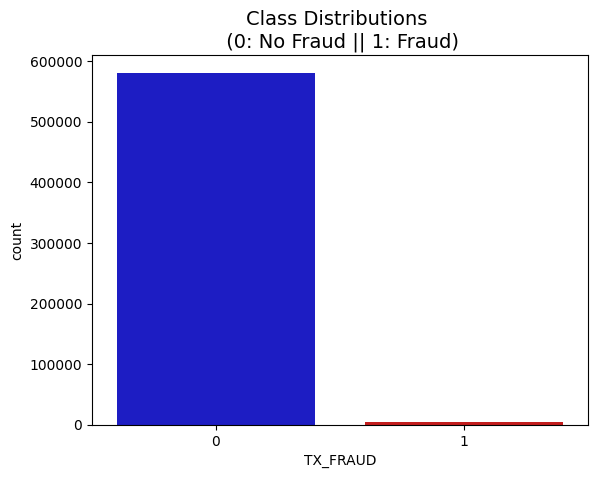

In [12]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='TX_FRAUD', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# Feature Engineering

In [79]:
df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT',
       'CUSTOMER_ID_NB_TX_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW',
       'CUSTOMER_ID_NB_TX_7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW',
       'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW',
       'TERMINAL_ID_NB_TX_1DAY_WINDOW', 'TERMINAL_ID_RISK_1DAY_WINDOW',
       'TERMINAL_ID_NB_TX_7DAY_WINDOW', 'TERMINAL_ID_RISK_7DAY_WINDOW',
       'TERMINAL_ID_NB_TX_30DAY_WINDOW', 'TERMINAL_ID_RISK_30DAY_WINDOW'],
      dtype='object')

In [80]:
df["TX_HOUR"] = pd.to_datetime(df["TX_DATETIME"]).dt.hour
df["TRANSACTION_TIME_CATEGORY"] = pd.cut(df["TX_HOUR"],
                                         bins=[0, 6, 12, 18, 24],
                                         labels=["night", "morning", "afternoon", "evening"],
                                         right=False)

In [81]:
df = df.drop('TX_HOUR', axis=1)
df = df.drop('TX_DURING_NIGHT', axis=1)
df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TRANSACTION_TIME_CATEGORY
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,1.0,57.160000,1.0,57.160000,1.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.0,night
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,1.0,81.510000,1.0,81.510000,1.0,81.510000,0.0,0.0,0.0,0.0,0.0,0.0,night
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,1.0,146.000000,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.0,night
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,1.0,64.490000,1.0,64.490000,1.0,64.490000,0.0,0.0,0.0,0.0,0.0,0.0,night
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,1.0,50.990000,1.0,50.990000,1.0,50.990000,0.0,0.0,0.0,0.0,0.0,0.0,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585172,585172,2018-05-31 23:57:35,3149,709,64.66,5270255,60,0,0,0,2.0,74.175000,15.0,64.122000,74.0,61.049324,2.0,0.0,5.0,0.0,31.0,0.0,evening
585173,585173,2018-05-31 23:57:53,237,575,18.46,5270273,60,0,0,0,4.0,28.702500,22.0,24.551364,114.0,24.300702,1.0,0.0,5.0,0.0,28.0,0.0,evening
585174,585174,2018-05-31 23:57:56,2445,6208,89.21,5270276,60,0,0,0,4.0,75.850000,19.0,68.788421,91.0,72.764725,0.0,0.0,1.0,0.0,25.0,0.0,evening
585175,585175,2018-05-31 23:58:14,3256,5601,3.50,5270294,60,0,0,0,3.0,4.603333,22.0,5.074545,105.0,5.424762,0.0,0.0,8.0,0.0,34.0,0.0,evening


# Association Rules

In [ ]:
pip install pandas mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TRANSACTION_TIME_CATEGORY
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,1.0,57.160000,1.0,57.160000,1.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.0,night
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,1.0,81.510000,1.0,81.510000,1.0,81.510000,0.0,0.0,0.0,0.0,0.0,0.0,night
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,1.0,146.000000,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.0,night
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,1.0,64.490000,1.0,64.490000,1.0,64.490000,0.0,0.0,0.0,0.0,0.0,0.0,night
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,1.0,50.990000,1.0,50.990000,1.0,50.990000,0.0,0.0,0.0,0.0,0.0,0.0,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585172,585172,2018-05-31 23:57:35,3149,709,64.66,5270255,60,0,0,0,2.0,74.175000,15.0,64.122000,74.0,61.049324,2.0,0.0,5.0,0.0,31.0,0.0,evening
585173,585173,2018-05-31 23:57:53,237,575,18.46,5270273,60,0,0,0,4.0,28.702500,22.0,24.551364,114.0,24.300702,1.0,0.0,5.0,0.0,28.0,0.0,evening
585174,585174,2018-05-31 23:57:56,2445,6208,89.21,5270276,60,0,0,0,4.0,75.850000,19.0,68.788421,91.0,72.764725,0.0,0.0,1.0,0.0,25.0,0.0,evening
585175,585175,2018-05-31 23:58:14,3256,5601,3.50,5270294,60,0,0,0,3.0,4.603333,22.0,5.074545,105.0,5.424762,0.0,0.0,8.0,0.0,34.0,0.0,evening


## K-Means Clustering

### TX_AMOUNT

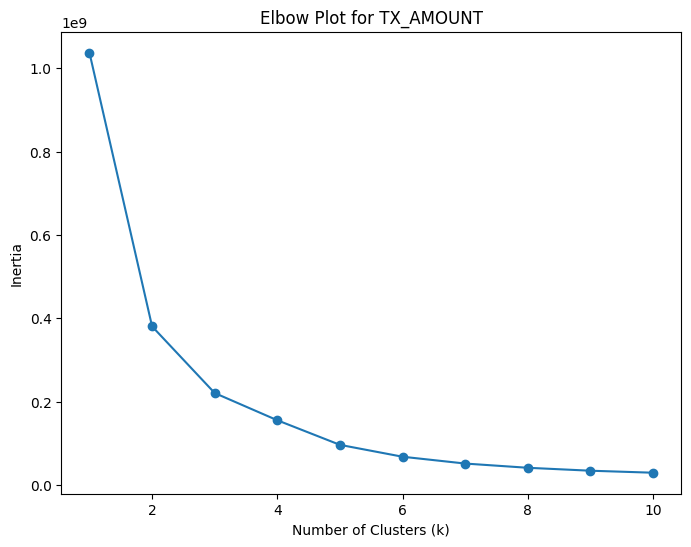

In [ ]:
# prompt: plot elbow plot on TX_AMOUNT

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Create a range of k values to test
k_range = range(1, 11)

# Initialize an empty list to store the inertia values
inertia_values = []

# Iterate over the k values and fit a KMeans model for each
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['TX_AMOUNT']])  # Fit on the 'TX_AMOUNT' column only
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for TX_AMOUNT')
plt.show()


In [ ]:
# from the elbow plot.
optimal_k = 3

# Perform KMeans clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['TX_AMOUNT_CLUSTER'] = kmeans.fit_predict(df[['TX_AMOUNT']])
df.head()


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TRANSACTION_TIME_CATEGORY,TX_AMOUNT_CLUSTER
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,1.0,57.16,1.0,57.16,1.0,57.16,0.0,0.0,0.0,0.0,0.0,0.0,night,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,1.0,81.51,1.0,81.51,1.0,81.51,0.0,0.0,0.0,0.0,0.0,0.0,night,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,1.0,146.00,1.0,146.00,1.0,146.00,0.0,0.0,0.0,0.0,0.0,0.0,night,1
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,1.0,64.49,1.0,64.49,1.0,64.49,0.0,0.0,0.0,0.0,0.0,0.0,night,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,1.0,50.99,1.0,50.99,1.0,50.99,0.0,0.0,0.0,0.0,0.0,0.0,night,0


In [ ]:
cluster_analysis = df.groupby('TX_AMOUNT_CLUSTER')['TX_AMOUNT'].agg(['count', 'mean', 'median', 'min', 'max'])
cluster_analysis

,count,mean,median,min,max
TX_AMOUNT_CLUSTER,,,,,
0,208712,68.491887,66.84,45.17,99.24
1,80857,130.381692,121.55,99.25,1039.30
2,295608,22.067495,21.23,0.00,45.16


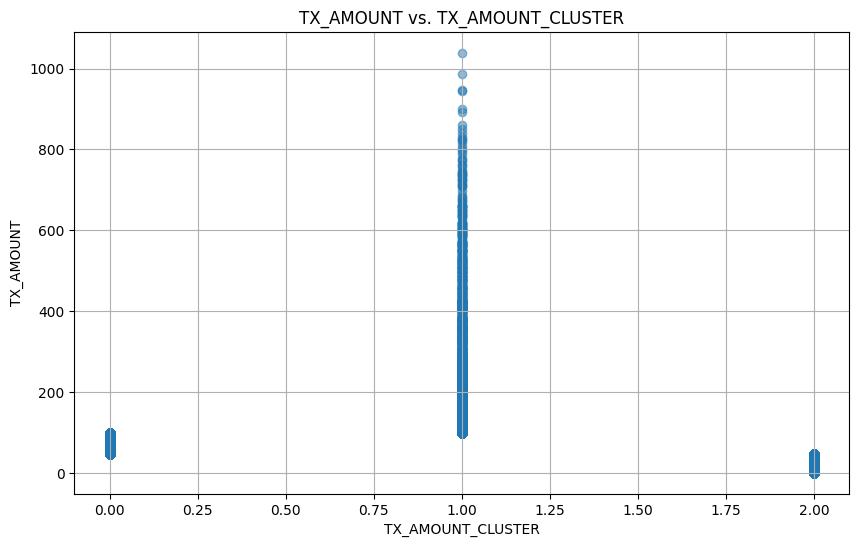

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['TX_AMOUNT_CLUSTER'], df['TX_AMOUNT'], alpha=0.5)  # Adjust alpha for visibility

# Customize the plot
plt.xlabel('TX_AMOUNT_CLUSTER')
plt.ylabel('TX_AMOUNT')
plt.title('TX_AMOUNT vs. TX_AMOUNT_CLUSTER')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
def transform_cluster_labels(cluster_label):
    if cluster_label == 0:
        return "medium"
    elif cluster_label == 1:
        return "high"
    elif cluster_label == 2:
        return "low"
    else:
        return cluster_label  # Return the original value if not 0, 1, or 2

df['TX_AMOUNT_CLUSTER'] = df['TX_AMOUNT_CLUSTER'].apply(transform_cluster_labels)

In [ ]:
cluster_analysis = df.groupby('TX_AMOUNT_CLUSTER')['TX_AMOUNT'].agg(['count', 'mean', 'median', 'min', 'max'])
cluster_analysis

,count,mean,median,min,max
TX_AMOUNT_CLUSTER,,,,,
high,80857,130.381692,121.55,99.25,1039.30
low,208712,68.491887,66.84,45.17,99.24
medium,295608,22.067495,21.23,0.00,45.16


### CUSTOMER_ID_NB_TX_1DAY_WINDOW

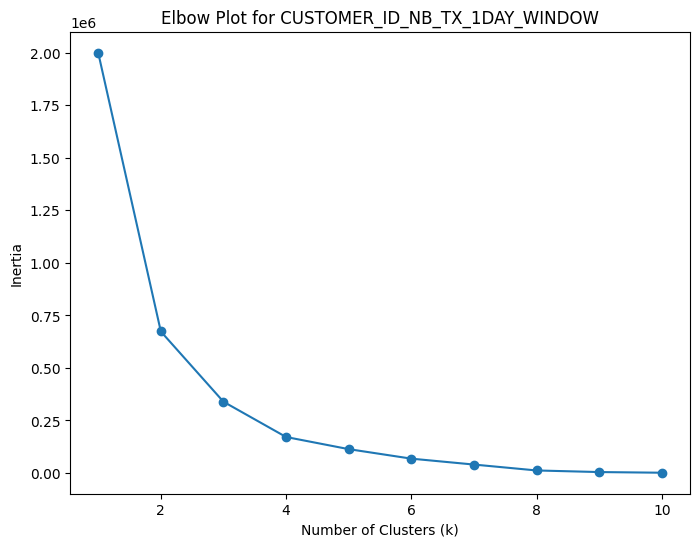

In [ ]:
# Create a range of k values to test
k_range = range(1, 11)

# Initialize an empty list to store the inertia values
inertia_values = []

# Iterate over the k values and fit a KMeans model for each
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['CUSTOMER_ID_NB_TX_1DAY_WINDOW']])  # Fit on the 'TX_AMOUNT' column only
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for CUSTOMER_ID_NB_TX_1DAY_WINDOW')
plt.show()

In [ ]:
# from the elbow plot.
optimal_k = 5

# Perform KMeans clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER'] = kmeans.fit_predict(df[['CUSTOMER_ID_NB_TX_1DAY_WINDOW']])
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TRANSACTION_TIME_CATEGORY,TX_AMOUNT_CLUSTER,CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,1.0,57.16,1.0,57.16,1.0,57.16,0.0,0.0,0.0,0.0,0.0,0.0,night,low,1
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,1.0,81.51,1.0,81.51,1.0,81.51,0.0,0.0,0.0,0.0,0.0,0.0,night,low,1
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,1.0,146.00,1.0,146.00,1.0,146.00,0.0,0.0,0.0,0.0,0.0,0.0,night,high,1
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,1.0,64.49,1.0,64.49,1.0,64.49,0.0,0.0,0.0,0.0,0.0,0.0,night,low,1
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,1.0,50.99,1.0,50.99,1.0,50.99,0.0,0.0,0.0,0.0,0.0,0.0,night,low,1


In [ ]:
cluster_analysis = df.groupby('CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER')['CUSTOMER_ID_NB_TX_1DAY_WINDOW'].agg(['count', 'mean', 'median', 'min', 'max'])
cluster_analysis

,count,mean,median,min,max
CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER,,,,,
0,106568,4.000000,4.0,4.0,4.0
1,190991,1.613704,2.0,1.0,2.0
2,41618,7.683983,7.0,7.0,14.0
3,119840,5.375976,5.0,5.0,6.0
4,126160,3.000000,3.0,3.0,3.0


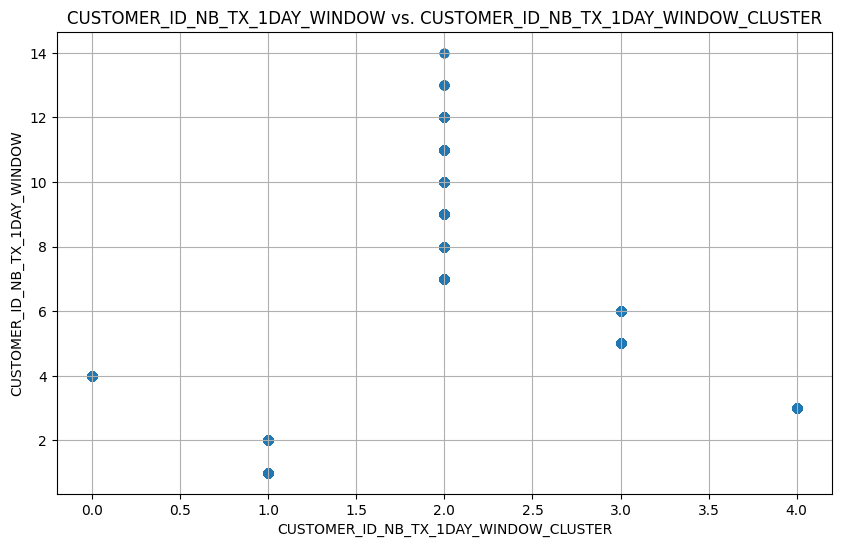

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER'], df['CUSTOMER_ID_NB_TX_1DAY_WINDOW'], alpha=0.5)  # Adjust alpha for visibility

# Customize the plot
plt.xlabel('CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER')
plt.ylabel('CUSTOMER_ID_NB_TX_1DAY_WINDOW')
plt.title('CUSTOMER_ID_NB_TX_1DAY_WINDOW vs. CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# สร้าง Mapping สำหรับชื่อคลัสเตอร์
cluster_names = {
    0: "High-Frequency Users",
    1: "Occasional Users",
    2: "Moderate Users",
    3: "Regular Users",
    4: "One-Time Users",
}

# เพิ่มคอลัมน์ชื่อคลัสเตอร์
df["CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER"] = df["CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER"].map(cluster_names)

In [ ]:
cluster_analysis = df.groupby('CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER')['CUSTOMER_ID_NB_TX_1DAY_WINDOW'].agg(['count', 'mean', 'median', 'min', 'max'])
cluster_analysis

,count,mean,median,min,max
CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER,,,,,
High-Frequency Users,106568,4.000000,4.0,4.0,4.0
Moderate Users,41618,7.683983,7.0,7.0,14.0
Occasional Users,190991,1.613704,2.0,1.0,2.0
One-Time Users,126160,3.000000,3.0,3.0,3.0
Regular Users,119840,5.375976,5.0,5.0,6.0


## Encoder

In [ ]:
# Encode
selected_features = ['CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER', 'TX_AMOUNT_CLUSTER', 'TRANSACTION_TIME_CATEGORY',
                  'TX_FRAUD', 'TX_DURING_WEEKEND']
df = df[selected_features]
# แปลงแต่ละแถวเป็น List ของ Items (Feature=Value)
transactions = df.apply(
    lambda row: [f"{col}={row[col]}" for col in df.columns],
    axis=1
).tolist()
transactions

[['CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Occasional Users',
  'TX_AMOUNT_CLUSTER=low',
  'TRANSACTION_TIME_CATEGORY=night',
  'TX_FRAUD=0',
  'TX_DURING_WEEKEND=1'],
 ['CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Occasional Users',
  'TX_AMOUNT_CLUSTER=low',
  'TRANSACTION_TIME_CATEGORY=night',
  'TX_FRAUD=0',
  'TX_DURING_WEEKEND=1'],
 ['CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Occasional Users',
  'TX_AMOUNT_CLUSTER=high',
  'TRANSACTION_TIME_CATEGORY=night',
  'TX_FRAUD=0',
  'TX_DURING_WEEKEND=1'],
 ['CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Occasional Users',
  'TX_AMOUNT_CLUSTER=low',
  'TRANSACTION_TIME_CATEGORY=night',
  'TX_FRAUD=0',
  'TX_DURING_WEEKEND=1'],
 ['CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Occasional Users',
  'TX_AMOUNT_CLUSTER=low',
  'TRANSACTION_TIME_CATEGORY=night',
  'TX_FRAUD=0',
  'TX_DURING_WEEKEND=1'],
 ['CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Occasional Users',
  'TX_AMOUNT_CLUSTER=medium',
  'TRANSACTION_TIME_CATEGORY=night',
  'TX_FRAUD=0',
  'TX_DURING_WEEKEND=1'],


In [ ]:
# Encode เป็น One-Hot Format
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

,CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users,CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Moderate Users,CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Occasional Users,CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=One-Time Users,CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users,TRANSACTION_TIME_CATEGORY=afternoon,TRANSACTION_TIME_CATEGORY=evening,TRANSACTION_TIME_CATEGORY=morning,TRANSACTION_TIME_CATEGORY=night,TX_AMOUNT_CLUSTER=high,TX_AMOUNT_CLUSTER=low,TX_AMOUNT_CLUSTER=medium,TX_DURING_WEEKEND=0,TX_DURING_WEEKEND=1,TX_FRAUD=0,TX_FRAUD=1
0,False,False,True,False,False,False,False,False,True,False,True,False,False,True,True,False
1,False,False,True,False,False,False,False,False,True,False,True,False,False,True,True,False
2,False,False,True,False,False,False,False,False,True,True,False,False,False,True,True,False
3,False,False,True,False,False,False,False,False,True,False,True,False,False,True,True,False
4,False,False,True,False,False,False,False,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585172,False,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False
585173,True,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
585174,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False
585175,False,False,False,True,False,False,True,False,False,False,False,True,True,False,True,False


## หา Frequent Itemsets

In [ ]:
frequent_itemsets = apriori(
    df_encoded,
    min_support=0.000001,
    use_colnames=True,
)

frequent_itemsets

,support,itemsets
0,0.182112,(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users)
1,0.071120,(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Moderate Users)
2,0.326382,(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Occasional Users)
3,0.215593,(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=One-Time Users)
4,0.204793,(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users)
...,...,...
1074,0.000007,"(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users, TX_AMOUNT_CLUSTER=low, TX_DURING_WEEKEND=1, TX_FRAUD=1, TRANSACTION_TIME_CATEGORY=night)"
1075,0.009669,"(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users, TX_DURING_WEEKEND=0, TX_AMOUNT_CLUSTER=medium, TX_FRAUD=0, TRANSACTION_TIME_CATEGORY=night)"
1076,0.000048,"(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users, TX_DURING_WEEKEND=0, TX_AMOUNT_CLUSTER=medium, TX_FRAUD=1, TRANSACTION_TIME_CATEGORY=night)"
1077,0.003377,"(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users, TX_AMOUNT_CLUSTER=medium, TX_FRAUD=0, TX_DURING_WEEKEND=1, TRANSACTION_TIME_CATEGORY=night)"


## สร้าง Rules

In [ ]:
# สร้าง Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(TRANSACTION_TIME_CATEGORY=afternoon),(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users),0.371828,0.182112,0.067720,0.182127,1.000077,1.0,0.000005,1.000017,0.000123,0.139278,0.000017,0.276991
1,(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users),(TRANSACTION_TIME_CATEGORY=afternoon),0.182112,0.371828,0.067720,0.371856,1.000077,1.0,0.000005,1.000046,0.000095,0.139278,0.000046,0.276991
2,(TRANSACTION_TIME_CATEGORY=evening),(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users),0.128177,0.182112,0.023675,0.184705,1.014237,1.0,0.000332,1.003180,0.016101,0.082602,0.003170,0.157353
3,(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users),(TRANSACTION_TIME_CATEGORY=evening),0.182112,0.128177,0.023675,0.130002,1.014237,1.0,0.000332,1.002098,0.017163,0.082602,0.002093,0.157353
4,(TRANSACTION_TIME_CATEGORY=night),(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users),0.128465,0.182112,0.023465,0.182654,1.002973,1.0,0.000070,1.000662,0.003401,0.081726,0.000662,0.155751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,"(TX_FRAUD=1, TRANSACTION_TIME_CATEGORY=night)","(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users, TX_AMOUNT_CLUSTER=medium, TX_DURING_WEEKEND=1)",0.000952,0.027646,0.000027,0.028725,1.039028,1.0,0.000001,1.001111,0.037598,0.000957,0.001110,0.014857
7018,(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users),"(TRANSACTION_TIME_CATEGORY=night, TX_AMOUNT_CLUSTER=medium, TX_FRAUD=1, TX_DURING_WEEKEND=1)",0.204793,0.000104,0.000027,0.000134,1.280783,1.0,0.000006,1.000029,0.275686,0.000133,0.000029,0.131214
7019,(TX_DURING_WEEKEND=1),"(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users, TX_AMOUNT_CLUSTER=medium, TX_FRAUD=1, TRANSACTION_TIME_CATEGORY=night)",0.278591,0.000075,0.000027,0.000098,1.305270,1.0,0.000006,1.000023,0.324192,0.000098,0.000023,0.181867
7020,(TX_FRAUD=1),"(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users, TRANSACTION_TIME_CATEGORY=night, TX_AMOUNT_CLUSTER=medium, TX_DURING_WEEKEND=1)",0.007418,0.003404,0.000027,0.003686,1.082750,1.0,0.000002,1.000283,0.076997,0.002533,0.000283,0.005859


In [ ]:
# กรองกฎที่ Consequent เป็น 'TX_FRAUD=Fraud'
fraud_rules = rules[rules['consequents'].apply(lambda x: 'TX_FRAUD=1' in x)]

# เรียงลำดับตาม Confidence และ Lift จากสูงไปต่ำ
fraud_rules = fraud_rules.sort_values(by=['confidence', 'lift'], ascending=False)

# แสดงผลเฉพาะคอลัมน์สำคัญ
fraud_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
6410,"(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users, TRANSACTION_TIME_CATEGORY=afternoon, TX_AMOUNT_CLUSTER=high, TX_DURING_WEEKEND=1)",(TX_FRAUD=1),0.000099,0.034442,4.642836
4019,"(TX_AMOUNT_CLUSTER=high, TX_DURING_WEEKEND=1, TRANSACTION_TIME_CATEGORY=evening, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users)",(TX_FRAUD=1),0.000027,0.029851,4.023951
3852,"(TX_AMOUNT_CLUSTER=high, TRANSACTION_TIME_CATEGORY=afternoon, TX_DURING_WEEKEND=1, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users)",(TX_FRAUD=1),0.000075,0.028553,3.848996
4325,"(TX_AMOUNT_CLUSTER=high, TX_DURING_WEEKEND=0, TRANSACTION_TIME_CATEGORY=night, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users)",(TX_FRAUD=1),0.000068,0.028110,3.789244
4532,"(TX_AMOUNT_CLUSTER=high, TRANSACTION_TIME_CATEGORY=afternoon, TX_DURING_WEEKEND=1, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Moderate Users)",(TX_FRAUD=1),0.000027,0.027682,3.731553
...,...,...,...,...,...
5042,(TX_DURING_WEEKEND=1),"(TX_AMOUNT_CLUSTER=high, TRANSACTION_TIME_CATEGORY=night, TX_FRAUD=1, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Moderate Users)",0.000007,0.000025,1.196497
4710,(TX_DURING_WEEKEND=1),"(TX_AMOUNT_CLUSTER=high, TRANSACTION_TIME_CATEGORY=evening, TX_FRAUD=1, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Moderate Users)",0.000007,0.000025,1.104459
5123,(TX_DURING_WEEKEND=0),"(TRANSACTION_TIME_CATEGORY=night, TX_AMOUNT_CLUSTER=medium, TX_FRAUD=1, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Moderate Users)",0.000014,0.000019,1.232157
5087,(TX_DURING_WEEKEND=0),"(TRANSACTION_TIME_CATEGORY=night, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Moderate Users, TX_FRAUD=1, TX_AMOUNT_CLUSTER=low)",0.000014,0.000019,1.108941


In [ ]:
fraud_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
6410,"(CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users, TRANSACTION_TIME_CATEGORY=afternoon, TX_AMOUNT_CLUSTER=high, TX_DURING_WEEKEND=1)",(TX_FRAUD=1),0.000099,0.034442,4.642836
4019,"(TX_AMOUNT_CLUSTER=high, TX_DURING_WEEKEND=1, TRANSACTION_TIME_CATEGORY=evening, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users)",(TX_FRAUD=1),0.000027,0.029851,4.023951
3852,"(TX_AMOUNT_CLUSTER=high, TRANSACTION_TIME_CATEGORY=afternoon, TX_DURING_WEEKEND=1, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users)",(TX_FRAUD=1),0.000075,0.028553,3.848996
4325,"(TX_AMOUNT_CLUSTER=high, TX_DURING_WEEKEND=0, TRANSACTION_TIME_CATEGORY=night, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users)",(TX_FRAUD=1),0.000068,0.028110,3.789244
4532,"(TX_AMOUNT_CLUSTER=high, TRANSACTION_TIME_CATEGORY=afternoon, TX_DURING_WEEKEND=1, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Moderate Users)",(TX_FRAUD=1),0.000027,0.027682,3.731553
2988,"(TX_AMOUNT_CLUSTER=high, TRANSACTION_TIME_CATEGORY=afternoon, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users)",(TX_FRAUD=1),0.000284,0.027593,3.719613
3446,"(TX_AMOUNT_CLUSTER=high, TX_DURING_WEEKEND=1, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Regular Users)",(TX_FRAUD=1),0.000203,0.026427,3.562398
5941,"(TX_AMOUNT_CLUSTER=high, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=One-Time Users, TX_DURING_WEEKEND=1, TRANSACTION_TIME_CATEGORY=evening)",(TX_FRAUD=1),0.000027,0.025974,3.501360
5420,"(TX_AMOUNT_CLUSTER=high, TX_DURING_WEEKEND=0, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=Occasional Users, TRANSACTION_TIME_CATEGORY=morning)",(TX_FRAUD=1),0.000313,0.025720,3.467158
1461,"(TX_AMOUNT_CLUSTER=high, TX_DURING_WEEKEND=1, CUSTOMER_ID_NB_TX_1DAY_WINDOW_CLUSTER=High-Frequency Users)",(TX_FRAUD=1),0.000179,0.025647,3.457315


## Conclusion

**กฎที่น่าสนใจ**

1.  **`{Regular Users, afternoon, TX_AMOUNT=high, TX_DURING_WEEKEND=1} -> {TX_FRAUD=1}` (Lift = 4.64):**
    *   **ลักษณะ:** ลูกค้าที่ใช้งานสม่ำเสมอ (5-6 ธุรกรรม/วัน), ทำรายการมูลค่าสูง (>= 99.25), ในช่วงบ่ายของวันหยุด
    *   **ความเสี่ยง:** สูงที่สุดในบรรดากฎทั้งหมด
    *   **Actionable Insight:** ธุรกรรมจากลูกค้ากลุ่มนี้ในช่วงเวลาดังกล่าว ควรได้รับการตรวจสอบเป็นพิเศษ

2.  **`{TX_AMOUNT=high, TX_DURING_WEEKEND=1, evening, High-Frequency Users} -> {TX_FRAUD=1}` (Lift = 4.02):**
    *   **ลักษณะ:** ลูกค้าที่ใช้งานถี่มาก (4 ธุรกรรม/วัน), ทำรายการมูลค่าสูงในวันหยุดช่วงเย็น
    *   **ความเสี่ยง:** สูง
    *   **Actionable Insight:** ควรมีระบบแจ้งเตือนสำหรับธุรกรรมลักษณะนี้

3.  **`{TX_AMOUNT=high, afternoon, TX_DURING_WEEKEND=1, High-Frequency Users} -> {TX_FRAUD=1}` (Lift = 3.85):**
    *   **ลักษณะ:** คล้ายกับข้อ 2 แต่เป็นช่วงบ่าย
    *   **ความเสี่ยง:** สูง
    * **Actionable Insight:** ตรวจสอบธุรกรรมช่วงบ่ายของลูกค้ากลุ่มนี้

4.  **`{TX_AMOUNT=high, TX_DURING_WEEKEND=0, night, High-Frequency Users} -> {TX_FRAUD=1}` (Lift = 3.79):**
    *   **ลักษณะ:** ลูกค้าใช้งานถี่มาก ทำรายการมูลค่าสูงตอนกลางคืน *ในวันธรรมดา*
    *   **ความเสี่ยง:** สูง
    *   **Actionable Insight:** รูปแบบนี้ผิดปกติ ควรมีการตรวจสอบ

5.  **`{TX_AMOUNT=high, afternoon, TX_DURING_WEEKEND=1, Moderate Users} -> {TX_FRAUD=1}` (Lift = 3.73):**
    *   **ลักษณะ:** ลูกค้าที่ใช้งานปานกลาง (7-14 ธุรกรรม/วัน) ทำรายการมูลค่าสูงในช่วงบ่ายของวันหยุด
    *   **ความเสี่ยง:** สูง
    * **Actionable Insight:** ตรวจสอบธุรกรรมของลูกค้ากลุ่มนี้

6.  **`{TX_AMOUNT=high, afternoon, Regular Users} -> {TX_FRAUD=1}` (Lift = 3.72):**
    *   **ลักษณะ:** ลูกค้าใช้งานสม่ำเสมอ ทำรายการมูลค่าสูงในช่วงบ่าย (ไม่ระบุวัน)
    *    **ความเสี่ยง:** สูง
    *  **Actionable Insight:** ควรมีเกณฑ์ตรวจสอบธุรกรรมมูลค่าสูงในช่วงบ่าย

7.  **`{TX_AMOUNT=high, TX_DURING_WEEKEND=1, Regular Users} -> {TX_FRAUD=1}` (Lift = 3.56):**
       *   **ลักษณะ:** ลูกค้าที่ใช้งานสม่ำเสมอ (5-6 ธุรกรรม/วัน) ทำรายการมูลค่าสูงในช่วงวันหยุด
       *    **ความเสี่ยง:** สูง
       * **Actionable Insight:** ตรวจสอบธุรกรรมมูลค่าสูงในวันหยุด

8.  **`{TX_AMOUNT=high, One-Time Users, TX_DURING_WEEKEND=1, evening} -> {TX_FRAUD=1}` (Lift = 3.50):**
    *   **ลักษณะ:** ลูกค้าใหม่/ใช้งานน้อยมาก ทำรายการมูลค่าสูงในวันหยุดช่วงเย็น
    *   **ความเสี่ยง:** สูง
    *   **Actionable Insight:** ตรวจสอบธุรกรรมจากลูกค้าใหม่/ลูกค้าที่ไม่ได้ใช้งานมานาน

9.  **`{TX_AMOUNT=high, TX_DURING_WEEKEND=0, Occasional Users, morning} -> {TX_FRAUD=1}` (Lift = 3.47):**
    *   **ลักษณะ:** ลูกค้านานๆ ใช้ที (1-2 ธุรกรรม/วัน) ทำรายการมูลค่าสูงตอนเช้าในวันธรรมดา
    *   **ความเสี่ยง:** สูง
     * **Actionable Insight:** ตรวจสอบธุรกรรมช่วงเช้าในวันธรรมดา

10. **`{TX_AMOUNT=high, TX_DURING_WEEKEND=1, High-Frequency Users}` (Lift = 3.46):**
      *   **ลักษณะ:** ลูกค้าที่ใช้งานถี่มาก ทำรายการมูลค่าสูงในวันหยุด
       *    **ความเสี่ยง:** สูง
       * **Actionable Insight:** ตรวจสอบธุรกรรมในวันหยุด

**Insights หลัก**

*   **มูลค่าสูง (`TX_AMOUNT_CLUSTER=high`) คือปัจจัยเสี่ยงสำคัญที่สุด:** ยังคงปรากฏในทุกกฎ
*   **พฤติกรรมลูกค้า + เวลา + มูลค่า:** ความเสี่ยงเกิดจากการรวมกันของหลายปัจจัย
*   **วันหยุด (Weekend) มีความเสี่ยงสูงกว่า:** แต่กฎที่เกี่ยวข้องกับวันธรรมดาก็มีความสำคัญ (โดยเฉพาะเมื่อเกิดตอนกลางคืนหรือเช้า)
*   **ความถี่ในการใช้งาน:** ทั้งลูกค้าที่ใช้งานน้อยมาก (One-Time/Occasional) และลูกค้าที่ใช้งานถี่มาก (High-Frequency) ล้วนมีความเสี่ยง

**สรุปสั้นๆ**

ธุรกรรมที่มียอดใช้จ่ายสูง, โดยเฉพาะอย่างยิ่งเมื่อเกิดในช่วงบ่าย/เย็น/กลางคืน หรือในวันหยุด, และมาจากลูกค้าที่มีพฤติกรรมการใช้งานผิดปกติ (ใช้งานถี่มาก, ใช้งานสม่ำเสมอในวันหยุด, ใช้งานน้อยมาก หรือเป็นลูกค้าใหม่) มีความเสี่ยงที่จะเป็นการฉ้อโกงสูง ควรมีระบบหรือเกณฑ์การตรวจสอบที่เข้มงวดสำหรับธุรกรรมเหล่านี้


# Classification

In [16]:
df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TRANSACTION_TIME_CATEGORY
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,1.0,57.160000,1.0,57.160000,1.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.0,night
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,1.0,81.510000,1.0,81.510000,1.0,81.510000,0.0,0.0,0.0,0.0,0.0,0.0,night
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,1.0,146.000000,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.0,night
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,1.0,64.490000,1.0,64.490000,1.0,64.490000,0.0,0.0,0.0,0.0,0.0,0.0,night
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,1.0,50.990000,1.0,50.990000,1.0,50.990000,0.0,0.0,0.0,0.0,0.0,0.0,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585172,585172,2018-05-31 23:57:35,3149,709,64.66,5270255,60,0,0,0,2.0,74.175000,15.0,64.122000,74.0,61.049324,2.0,0.0,5.0,0.0,31.0,0.0,evening
585173,585173,2018-05-31 23:57:53,237,575,18.46,5270273,60,0,0,0,4.0,28.702500,22.0,24.551364,114.0,24.300702,1.0,0.0,5.0,0.0,28.0,0.0,evening
585174,585174,2018-05-31 23:57:56,2445,6208,89.21,5270276,60,0,0,0,4.0,75.850000,19.0,68.788421,91.0,72.764725,0.0,0.0,1.0,0.0,25.0,0.0,evening
585175,585175,2018-05-31 23:58:14,3256,5601,3.50,5270294,60,0,0,0,3.0,4.603333,22.0,5.074545,105.0,5.424762,0.0,0.0,8.0,0.0,34.0,0.0,evening


In [71]:
# แปลงคอลัมน์ datetime และเรียงลำดับ
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df = df.sort_values('TX_DATETIME').reset_index(drop=True)

In [72]:
# แปลงข้อมูล categorical เป็นตัวเลข
df = pd.get_dummies(df, columns=['TRANSACTION_TIME_CATEGORY'], dtype=int)

In [73]:
df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TRANSACTION_TIME_CATEGORY_night,TRANSACTION_TIME_CATEGORY_morning,TRANSACTION_TIME_CATEGORY_afternoon,TRANSACTION_TIME_CATEGORY_evening
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,1.0,57.160000,1.0,57.160000,1.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,1.0,81.510000,1.0,81.510000,1.0,81.510000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,1.0,146.000000,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,1.0,64.490000,1.0,64.490000,1.0,64.490000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,1.0,50.990000,1.0,50.990000,1.0,50.990000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585172,585172,2018-05-31 23:57:35,3149,709,64.66,5270255,60,0,0,0,2.0,74.175000,15.0,64.122000,74.0,61.049324,2.0,0.0,5.0,0.0,31.0,0.0,0,0,0,1
585173,585173,2018-05-31 23:57:53,237,575,18.46,5270273,60,0,0,0,4.0,28.702500,22.0,24.551364,114.0,24.300702,1.0,0.0,5.0,0.0,28.0,0.0,0,0,0,1
585174,585174,2018-05-31 23:57:56,2445,6208,89.21,5270276,60,0,0,0,4.0,75.850000,19.0,68.788421,91.0,72.764725,0.0,0.0,1.0,0.0,25.0,0.0,0,0,0,1
585175,585175,2018-05-31 23:58:14,3256,5601,3.50,5270294,60,0,0,0,3.0,4.603333,22.0,5.074545,105.0,5.424762,0.0,0.0,8.0,0.0,34.0,0.0,0,0,0,1


In [20]:
# กำหนด features และ target
features = [
    'TX_AMOUNT', 'TX_DURING_WEEKEND', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
    'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
    'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
    'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
    'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
    'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
    'TERMINAL_ID_RISK_30DAY_WINDOW',
    'TRANSACTION_TIME_CATEGORY_afternoon', 'TRANSACTION_TIME_CATEGORY_evening',
    'TRANSACTION_TIME_CATEGORY_morning', 'TRANSACTION_TIME_CATEGORY_night'
]
target = 'TX_FRAUD'

In [21]:
# แบ่งข้อมูลตามเวลา (80% แรกเป็นฝึก, 20% สุดท้ายเป็นทดสอบ)
split_date = df['TX_DATETIME'].quantile(0.8)

X_train = df[df['TX_DATETIME'] <= split_date][features]
y_train = df[df['TX_DATETIME'] <= split_date][target]

X_test = df[df['TX_DATETIME'] > split_date][features]
y_test = df[df['TX_DATETIME'] > split_date][target]

In [22]:
# ตรวจสอบข้อมูลหลังแบ่ง
print("\n=== ข้อมูลฝึก ===")
print(f"จำนวนข้อมูลฝึก: {len(X_train)}")
print(f"สัดส่วน Fraud ในข้อมูลฝึก: {y_train.mean():.2%}")

print("\n=== ข้อมูลทดสอบ ===")
print(f"จำนวนข้อมูลทดสอบ: {len(X_test)}")
print(f"สัดส่วน Fraud ในข้อมูลทดสอบ: {y_test.mean():.2%}")


=== ข้อมูลฝึก ===
จำนวนข้อมูลฝึก: 468141
สัดส่วน Fraud ในข้อมูลฝึก: 0.71%

=== ข้อมูลทดสอบ ===
จำนวนข้อมูลทดสอบ: 117036
สัดส่วน Fraud ในข้อมูลทดสอบ: 0.88%


In [23]:
# ตรวจสอบช่วงเวลา
print("\n=== ช่วงเวลาในข้อมูล ===")
print(f"วันที่เริ่มต้น: {df['TX_DATETIME'].min()}")
print(f"วันที่สิ้นสุด: {df['TX_DATETIME'].max()}")
print(f"วันที่แบ่งข้อมูล: {split_date}")

# ตรวจสอบความสมดุล Class
print("\n=== การกระจายตัวของ Class ===")
print(y_train.value_counts(normalize=True).rename({0: 'Non Fruad', 1: 'Fraud'}))


=== ช่วงเวลาในข้อมูล ===
วันที่เริ่มต้น: 2018-04-01 00:00:31
วันที่สิ้นสุด: 2018-05-31 23:58:18
วันที่แบ่งข้อมูล: 2018-05-19 15:48:52.200000

=== การกระจายตัวของ Class ===
TX_FRAUD
Non Fruad    0.992938
Fraud        0.007062
Name: proportion, dtype: float64


In [24]:
# กำหนดโมเดลและ pipeline
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Short Decision Tree': DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train))
}

pipelines = {}
for name, model in models.items():
    if name != 'Naive Bayes':
        pipelines[name] = imbpipeline([
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('model', model)
        ])
    else:
        pipelines[name] = imbpipeline([
            ('smote', SMOTE(random_state=42)),
            ('model', model)
        ])

In [25]:
# ฝึกโมเดลและประเมินผล
results = []
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:,1]

    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }
    results.append(pd.DataFrame([metrics]))

In [26]:
# แสดงผลลัพธ์
results_df = pd.concat(results).reset_index(drop=True)
print("\n=== Performance Metrics ===")
print(results_df)


=== Performance Metrics ===
                 Model  Accuracy  Precision    Recall        F1   AUC-ROC
0  Logistic Regression  0.929859   0.093403  0.796135  0.167191  0.900339
1        Decision Tree  0.990601   0.476934  0.649275  0.549918  0.821461
2  Short Decision Tree  0.985005   0.328897  0.668599  0.440905  0.825686
3        Random Forest  0.995335   0.778791  0.659903  0.714435  0.906256
4          Naive Bayes  0.975580   0.214532  0.661836  0.324030  0.830478
5              XGBoost  0.867067   0.048667  0.756522  0.091451  0.855783


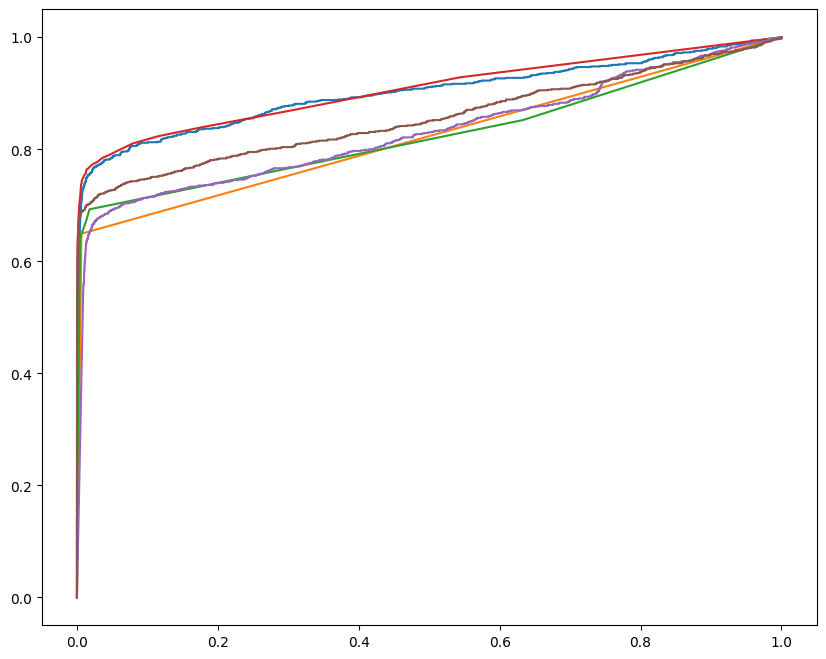

In [27]:
# วาดกราฟ ROC Curve
plt.figure(figsize=(10, 8))
for name, pipeline in pipelines.items():
    y_proba = pipeline.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

<ipython-input-28-3fabe902ead5>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


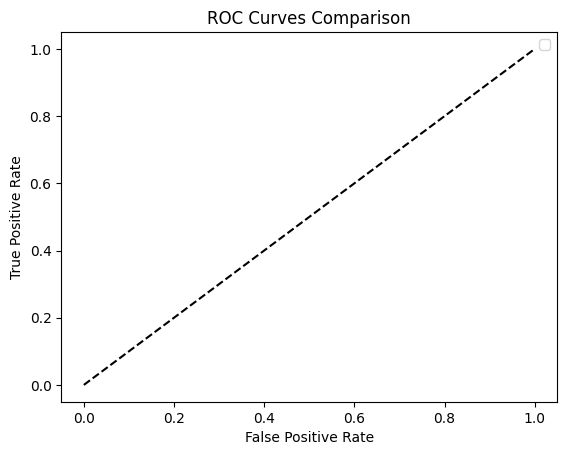

In [28]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

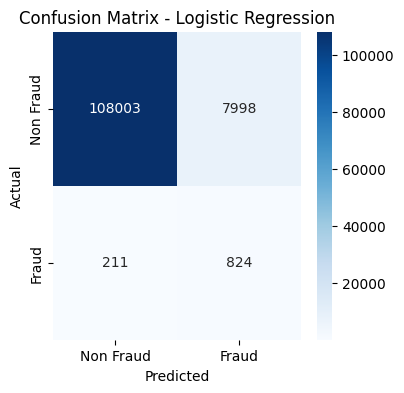

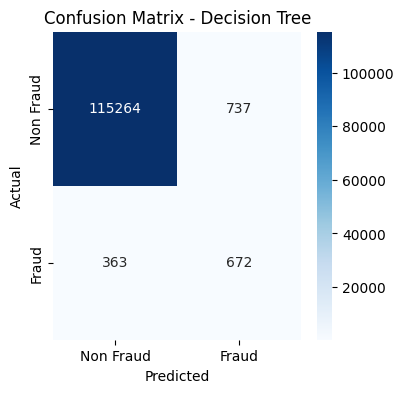

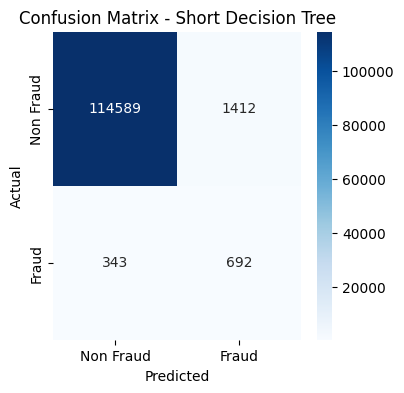

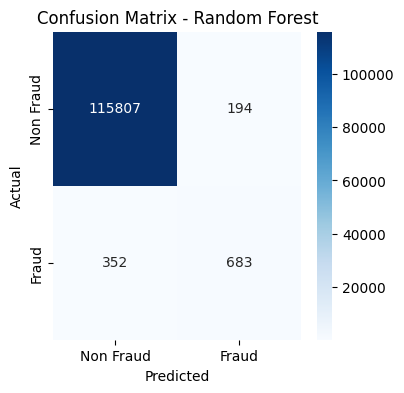

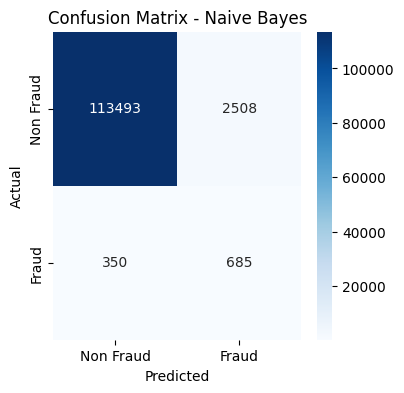

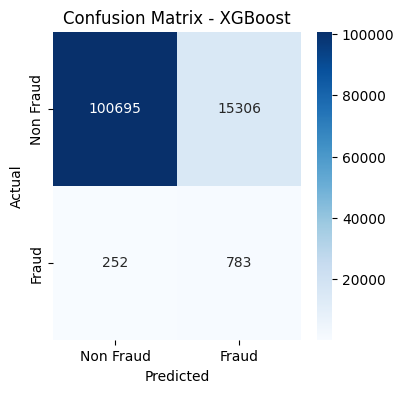

In [30]:
# วาด Confusion Matrix
for name, pipeline in pipelines.items():
    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non Fraud', 'Fraud'],
                yticklabels=['Non Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# 1

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [82]:
# Feature Engineering
df['TX_AMOUNT_RATIO_7DAY'] = df['TX_AMOUNT'] / (df['CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW'] + 1e-6)
df['TERMINAL_RISK_AMOUNT'] = df['TERMINAL_ID_RISK_30DAY_WINDOW'] * df['TX_AMOUNT']
df = pd.get_dummies(df, columns=['TRANSACTION_TIME_CATEGORY'], dtype=int)
df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_AMOUNT_RATIO_7DAY,TERMINAL_RISK_AMOUNT,TRANSACTION_TIME_CATEGORY_night,TRANSACTION_TIME_CATEGORY_morning,TRANSACTION_TIME_CATEGORY_afternoon,TRANSACTION_TIME_CATEGORY_evening
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,1.0,57.160000,1.0,57.160000,1.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,1.0,81.510000,1.0,81.510000,1.0,81.510000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,1.0,146.000000,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,1.0,64.490000,1.0,64.490000,1.0,64.490000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,1.0,50.990000,1.0,50.990000,1.0,50.990000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585172,585172,2018-05-31 23:57:35,3149,709,64.66,5270255,60,0,0,0,2.0,74.175000,15.0,64.122000,74.0,61.049324,2.0,0.0,5.0,0.0,31.0,0.0,1.008390,0.0,0,0,0,1
585173,585173,2018-05-31 23:57:53,237,575,18.46,5270273,60,0,0,0,4.0,28.702500,22.0,24.551364,114.0,24.300702,1.0,0.0,5.0,0.0,28.0,0.0,0.751893,0.0,0,0,0,1
585174,585174,2018-05-31 23:57:56,2445,6208,89.21,5270276,60,0,0,0,4.0,75.850000,19.0,68.788421,91.0,72.764725,0.0,0.0,1.0,0.0,25.0,0.0,1.296875,0.0,0,0,0,1
585175,585175,2018-05-31 23:58:14,3256,5601,3.50,5270294,60,0,0,0,3.0,4.603333,22.0,5.074545,105.0,5.424762,0.0,0.0,8.0,0.0,34.0,0.0,0.689717,0.0,0,0,0,1


In [84]:
# prompt: perform min-max scaler on TX_AMOUNT, CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW, CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW, CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW, TX_AMOUNT_RATIO_7DAY

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['TX_AMOUNT', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW',
                    'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TX_AMOUNT_RATIO_7DAY']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


<ipython-input-84-2497c9b26dc1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [83]:
features = [
    'TX_DATETIME','TX_AMOUNT', 'TX_DURING_WEEKEND', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
    'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
    'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
    'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
    'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
    'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
    'TERMINAL_ID_RISK_30DAY_WINDOW',
    'TRANSACTION_TIME_CATEGORY_afternoon', 'TRANSACTION_TIME_CATEGORY_evening',
    'TRANSACTION_TIME_CATEGORY_morning', 'TRANSACTION_TIME_CATEGORY_night',
    'TX_AMOUNT_RATIO_7DAY', 'TERMINAL_RISK_AMOUNT', 'TX_FRAUD'
]
df = df[features]
df

,TX_DATETIME,TX_AMOUNT,TX_DURING_WEEKEND,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TRANSACTION_TIME_CATEGORY_afternoon,TRANSACTION_TIME_CATEGORY_evening,TRANSACTION_TIME_CATEGORY_morning,TRANSACTION_TIME_CATEGORY_night,TX_AMOUNT_RATIO_7DAY,TERMINAL_RISK_AMOUNT,TX_FRAUD
0,2018-04-01 00:00:31,57.16,1,1.0,57.160000,1.0,57.160000,1.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1.000000,0.0,0
1,2018-04-01 00:02:10,81.51,1,1.0,81.510000,1.0,81.510000,1.0,81.510000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1.000000,0.0,0
2,2018-04-01 00:07:56,146.00,1,1.0,146.000000,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1.000000,0.0,0
3,2018-04-01 00:09:29,64.49,1,1.0,64.490000,1.0,64.490000,1.0,64.490000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1.000000,0.0,0
4,2018-04-01 00:10:34,50.99,1,1.0,50.990000,1.0,50.990000,1.0,50.990000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585172,2018-05-31 23:57:35,64.66,0,2.0,74.175000,15.0,64.122000,74.0,61.049324,2.0,0.0,5.0,0.0,31.0,0.0,0,1,0,0,1.008390,0.0,0
585173,2018-05-31 23:57:53,18.46,0,4.0,28.702500,22.0,24.551364,114.0,24.300702,1.0,0.0,5.0,0.0,28.0,0.0,0,1,0,0,0.751893,0.0,0
585174,2018-05-31 23:57:56,89.21,0,4.0,75.850000,19.0,68.788421,91.0,72.764725,0.0,0.0,1.0,0.0,25.0,0.0,0,1,0,0,1.296875,0.0,0
585175,2018-05-31 23:58:14,3.50,0,3.0,4.603333,22.0,5.074545,105.0,5.424762,0.0,0.0,8.0,0.0,34.0,0.0,0,1,0,0,0.689717,0.0,0


In [85]:
# แบ่งข้อมูลตามเวลา 80:20
split_date = df['TX_DATETIME'].quantile(0.8)
train = df[df['TX_DATETIME'] <= split_date]
test = df[df['TX_DATETIME'] > split_date]

In [86]:
train

,TX_DATETIME,TX_AMOUNT,TX_DURING_WEEKEND,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TRANSACTION_TIME_CATEGORY_afternoon,TRANSACTION_TIME_CATEGORY_evening,TRANSACTION_TIME_CATEGORY_morning,TRANSACTION_TIME_CATEGORY_night,TX_AMOUNT_RATIO_7DAY,TERMINAL_RISK_AMOUNT,TX_FRAUD
0,2018-04-01 00:00:31,0.054999,1,1.0,0.069844,1.0,0.125010,1.0,0.198256,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,1,0.121594,0.0000,0
1,2018-04-01 00:02:10,0.078428,1,1.0,0.099597,1.0,0.178282,1.0,0.283024,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,1,0.121594,0.0000,0
2,2018-04-01 00:07:56,0.140479,1,1.0,0.178397,1.0,0.319372,1.0,0.507528,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,1,0.121594,0.0000,0
3,2018-04-01 00:09:29,0.062051,1,1.0,0.078800,1.0,0.141046,1.0,0.223773,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,1,0.121594,0.0000,0
4,2018-04-01 00:10:34,0.049062,1,1.0,0.062304,1.0,0.111511,1.0,0.176777,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,1,0.121594,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468136,2018-05-19 15:48:26,0.002155,1,7.0,0.006689,25.0,0.012873,110.0,0.019116,1.0,0.0,7.0,0.0,20.0,0.000000,1,0,0,0,0.046133,0.0000,0
468137,2018-05-19 15:48:32,0.011623,1,7.0,0.045371,29.0,0.119338,94.0,0.191283,3.0,0.0,8.0,0.0,30.0,0.000000,1,0,0,0,0.026918,0.0000,0
468138,2018-05-19 15:48:34,0.015751,1,3.0,0.061848,13.0,0.200734,52.0,0.340080,0.0,0.0,5.0,0.0,17.0,0.000000,1,0,0,0,0.021689,0.0000,0
468139,2018-05-19 15:48:39,0.073376,1,2.0,0.115371,18.0,0.158162,82.0,0.242278,2.0,0.0,9.0,0.0,28.0,0.000000,1,0,0,0,0.128230,0.0000,0


In [88]:
print("Train Data shape:", train.shape)
print("Test Data shape:", test.shape)

Train Data shape: (468141, 22)
Test Data shape: (117036, 22)


In [89]:
train.groupby(['TX_FRAUD']).count()

,TX_DATETIME,TX_AMOUNT,TX_DURING_WEEKEND,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TRANSACTION_TIME_CATEGORY_afternoon,TRANSACTION_TIME_CATEGORY_evening,TRANSACTION_TIME_CATEGORY_morning,TRANSACTION_TIME_CATEGORY_night,TX_AMOUNT_RATIO_7DAY,TERMINAL_RISK_AMOUNT
TX_FRAUD,,,,,,,,,,,,,,,,,,,,,
0,464835,464835,464835,464835,464835,464835,464835,464835,464835,464835,464835,464835,464835,464835,464835,464835,464835,464835,464835,464835,464835
1,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306


In [91]:
3306/464835

0.007112201103617413

In [90]:
test.groupby(['TX_FRAUD']).count()

,TX_DATETIME,TX_AMOUNT,TX_DURING_WEEKEND,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TRANSACTION_TIME_CATEGORY_afternoon,TRANSACTION_TIME_CATEGORY_evening,TRANSACTION_TIME_CATEGORY_morning,TRANSACTION_TIME_CATEGORY_night,TX_AMOUNT_RATIO_7DAY,TERMINAL_RISK_AMOUNT
TX_FRAUD,,,,,,,,,,,,,,,,,,,,,
0,116001,116001,116001,116001,116001,116001,116001,116001,116001,116001,116001,116001,116001,116001,116001,116001,116001,116001,116001,116001,116001
1,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035


In [92]:
1035/116001

0.008922336876406239

In [ ]:
train = train.drop('TX_DATETIME', axis = 1)
test = test.drop('TX_DATETIME', axis = 1)

In [96]:
print(train.columns)
print(test.columns)

Index(['TX_AMOUNT', 'TX_DURING_WEEKEND', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW', 'TRANSACTION_TIME_CATEGORY_afternoon',
       'TRANSACTION_TIME_CATEGORY_evening',
       'TRANSACTION_TIME_CATEGORY_morning', 'TRANSACTION_TIME_CATEGORY_night',
       'TX_AMOUNT_RATIO_7DAY', 'TERMINAL_RISK_AMOUNT', 'TX_FRAUD'],
      dtype='object')
Index(['TX_AMOUNT', 'TX_DURING_WEEKEND', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AV

In [93]:
from sklearn.model_selection import TimeSeriesSplit

# แบ่งข้อมูลเป็น 10 Folds ตามเวลา (ไม่สับเปลี่ยน)
tscv = TimeSeriesSplit(n_splits=10)

In [97]:
X_train = train.drop('TX_FRAUD', axis = 1)
y_train = train['TX_FRAUD']